In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [8]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [9]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [10]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 27)           837         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 27)           108         dense_8[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 24)           672         batch_normalization_10[0][0]     
____________________________________________________________________________________

256326/256326 [==============================] - 15s 60us/step - loss: 11.9857 - rec_loss: 20.6893 - kl_loss: 2.8958 - val_loss: 11.8550 - val_rec_loss: 20.4156 - val_kl_loss: 2.8857
Epoch 18/150
256326/256326 [==============================] - 15s 60us/step - loss: 11.9934 - rec_loss: 20.7054 - kl_loss: 2.8834 - val_loss: 11.8322 - val_rec_loss: 20.4551 - val_kl_loss: 2.8052
Epoch 19/150
256326/256326 [==============================] - 16s 61us/step - loss: 11.9554 - rec_loss: 20.6272 - kl_loss: 2.8869 - val_loss: 11.9129 - val_rec_loss: 20.5243 - val_kl_loss: 2.8928
Epoch 20/150
256326/256326 [==============================] - 15s 59us/step - loss: 11.9438 - rec_loss: 20.5779 - kl_loss: 2.8937 - val_loss: 11.7678 - val_rec_loss: 20.2357 - val_kl_loss: 2.8888
Epoch 21/150
256326/256326 [==============================] - 15s 59us/step - loss: 11.8710 - rec_loss: 20.4220 - kl_loss: 2.9032 - val_loss: 11.6772 - val_rec_loss: 19.9604 - val_kl_loss: 2.9634
Epoch 22/150
256326/256326 [=====

Epoch 59/150
256326/256326 [==============================] - 15s 58us/step - loss: 11.4266 - rec_loss: 19.3697 - kl_loss: 3.0414 - val_loss: 11.1848 - val_rec_loss: 18.8637 - val_kl_loss: 3.0643
Epoch 60/150
256326/256326 [==============================] - 15s 58us/step - loss: 11.4232 - rec_loss: 19.3753 - kl_loss: 3.0358 - val_loss: 11.2949 - val_rec_loss: 19.1327 - val_kl_loss: 3.0190
Epoch 61/150
256326/256326 [==============================] - 15s 58us/step - loss: 11.4349 - rec_loss: 19.4076 - kl_loss: 3.0245 - val_loss: 11.2669 - val_rec_loss: 19.1084 - val_kl_loss: 2.9804
Epoch 62/150
256326/256326 [==============================] - 15s 60us/step - loss: 11.4324 - rec_loss: 19.4075 - kl_loss: 3.0276 - val_loss: 11.2234 - val_rec_loss: 18.9934 - val_kl_loss: 3.0200
Epoch 63/150
256326/256326 [==============================] - 15s 58us/step - loss: 11.4139 - rec_loss: 19.3369 - kl_loss: 3.0502 - val_loss: 11.2497 - val_rec_loss: 19.0660 - val_kl_loss: 3.0089
Epoch 64/150
256326/

Epoch 101/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1262 - rec_loss: 18.6576 - kl_loss: 3.1343 - val_loss: 11.0377 - val_rec_loss: 18.5245 - val_kl_loss: 3.0976
Epoch 102/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.2025 - rec_loss: 18.8381 - kl_loss: 3.1116 - val_loss: 10.9312 - val_rec_loss: 18.3365 - val_kl_loss: 3.0645
Epoch 103/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1745 - rec_loss: 18.7645 - kl_loss: 3.1258 - val_loss: 11.0889 - val_rec_loss: 18.6564 - val_kl_loss: 3.0667
Epoch 104/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1441 - rec_loss: 18.7233 - kl_loss: 3.1128 - val_loss: 11.3850 - val_rec_loss: 19.1976 - val_kl_loss: 3.1162
Epoch 105/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1698 - rec_loss: 18.7434 - kl_loss: 3.1333 - val_loss: 11.0950 - val_rec_loss: 18.6527 - val_kl_loss: 3.0737
Epoch 106/150
2

256326/256326 [==============================] - 14s 54us/step - loss: 11.1125 - rec_loss: 18.5974 - kl_loss: 3.1579 - val_loss: 10.9605 - val_rec_loss: 18.3559 - val_kl_loss: 3.1050
Epoch 143/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1199 - rec_loss: 18.6218 - kl_loss: 3.1507 - val_loss: 11.1112 - val_rec_loss: 18.6230 - val_kl_loss: 3.1190
Epoch 144/150
256326/256326 [==============================] - 14s 54us/step - loss: 11.1290 - rec_loss: 18.6290 - kl_loss: 3.1565 - val_loss: 11.1052 - val_rec_loss: 18.6207 - val_kl_loss: 3.1292
Epoch 145/150
256326/256326 [==============================] - 14s 55us/step - loss: 11.1565 - rec_loss: 18.6900 - kl_loss: 3.1603 - val_loss: 11.1406 - val_rec_loss: 18.6417 - val_kl_loss: 3.1826
Epoch 146/150
256326/256326 [==============================] - 14s 55us/step - loss: 11.1236 - rec_loss: 18.6351 - kl_loss: 3.1559 - val_loss: 11.0243 - val_rec_loss: 18.5890 - val_kl_loss: 3.0099
Epoch 147/150
256326/256326 [

256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 44/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 45/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 46/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 47/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 48/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 49/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0045 - accurac

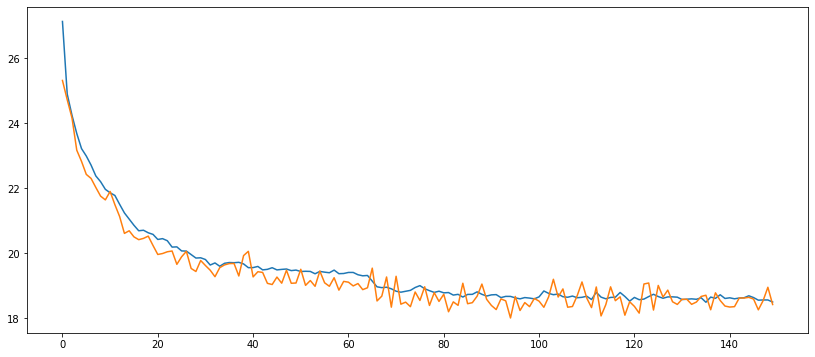

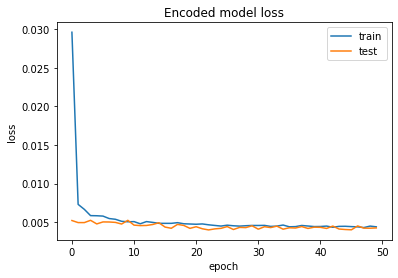

Overall accuracy of Convolutional Neural Network model: 0.9991573329588147


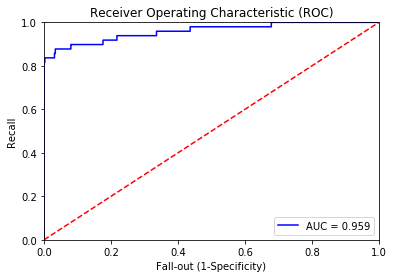

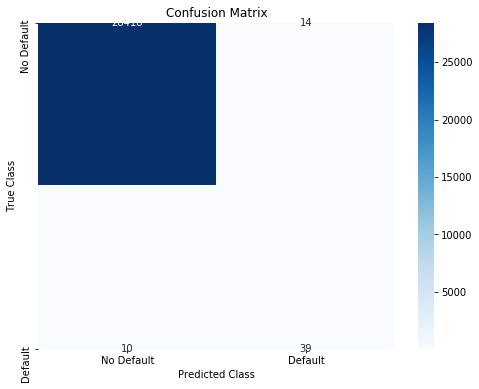

AUC(ROC): 0.8977129822103291
Precision: 0.7358490566037735
Recall: 0.7959183673469388
F1 score: 0.7647058823529412
False positives: 14
True positives: 39
False negatives: 10
True negatives: 28418
Fold #2
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 27)           837         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 27)           108         dense_17[0][0]                   
______________________________________________________________________________________

256326/256326 [==============================] - 13s 51us/step - loss: 11.9398 - rec_loss: 20.5671 - kl_loss: 2.8808 - val_loss: 11.8411 - val_rec_loss: 20.4554 - val_kl_loss: 2.7986
Epoch 17/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.8900 - rec_loss: 20.4590 - kl_loss: 2.8941 - val_loss: 11.8828 - val_rec_loss: 20.5088 - val_kl_loss: 2.8293
Epoch 18/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.8338 - rec_loss: 20.3247 - kl_loss: 2.9090 - val_loss: 11.8608 - val_rec_loss: 20.4001 - val_kl_loss: 2.8917
Epoch 19/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.8425 - rec_loss: 20.3477 - kl_loss: 2.9064 - val_loss: 11.6921 - val_rec_loss: 20.0604 - val_kl_loss: 2.9197
Epoch 20/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.8102 - rec_loss: 20.2921 - kl_loss: 2.9092 - val_loss: 12.1843 - val_rec_loss: 21.0720 - val_kl_loss: 2.8682
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.3969 - rec_loss: 19.2901 - kl_loss: 3.0757 - val_loss: 11.2264 - val_rec_loss: 18.9806 - val_kl_loss: 3.0502
Epoch 59/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.3822 - rec_loss: 19.2741 - kl_loss: 3.0589 - val_loss: 11.3998 - val_rec_loss: 19.3998 - val_kl_loss: 2.9846
Epoch 60/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.4040 - rec_loss: 19.3260 - kl_loss: 3.0551 - val_loss: 11.6646 - val_rec_loss: 19.9126 - val_kl_loss: 2.9881
Epoch 61/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.4037 - rec_loss: 19.3204 - kl_loss: 3.0556 - val_loss: 11.4369 - val_rec_loss: 19.3173 - val_kl_loss: 3.1394
Epoch 62/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.4062 - rec_loss: 19.3149 - kl_loss: 3.0697 - val_loss: 11.3174 - val_rec_loss: 19.1620 - val_kl_loss: 3.0597
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1925 - rec_loss: 18.8029 - kl_loss: 3.1329 - val_loss: 11.1029 - val_rec_loss: 18.6125 - val_kl_loss: 3.1484
Epoch 101/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1877 - rec_loss: 18.7780 - kl_loss: 3.1430 - val_loss: 11.2994 - val_rec_loss: 19.0569 - val_kl_loss: 3.0742
Epoch 102/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.2408 - rec_loss: 18.8833 - kl_loss: 3.1410 - val_loss: 11.2840 - val_rec_loss: 18.9773 - val_kl_loss: 3.1410
Epoch 103/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1582 - rec_loss: 18.7327 - kl_loss: 3.1403 - val_loss: 11.2283 - val_rec_loss: 18.8891 - val_kl_loss: 3.1255
Epoch 104/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1138 - rec_loss: 18.6471 - kl_loss: 3.1317 - val_loss: 10.8585 - val_rec_loss: 18.2476 - val_kl_loss: 3.0249
Epoch 105/150
2

256326/256326 [==============================] - 13s 51us/step - loss: 11.1951 - rec_loss: 18.8294 - kl_loss: 3.1103 - val_loss: 11.0641 - val_rec_loss: 18.7279 - val_kl_loss: 2.9619
Epoch 142/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.0684 - rec_loss: 18.5545 - kl_loss: 3.1308 - val_loss: 10.9828 - val_rec_loss: 18.5098 - val_kl_loss: 2.9964
Epoch 143/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.0210 - rec_loss: 18.4302 - kl_loss: 3.1600 - val_loss: 11.1178 - val_rec_loss: 18.8369 - val_kl_loss: 2.9545
Epoch 144/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.0509 - rec_loss: 18.5146 - kl_loss: 3.1353 - val_loss: 11.2206 - val_rec_loss: 18.9110 - val_kl_loss: 3.0846
Epoch 145/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.0639 - rec_loss: 18.5191 - kl_loss: 3.1417 - val_loss: 11.0166 - val_rec_loss: 18.4578 - val_kl_loss: 3.1111
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 43/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 44/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 45/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 46/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 47/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 48/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.00

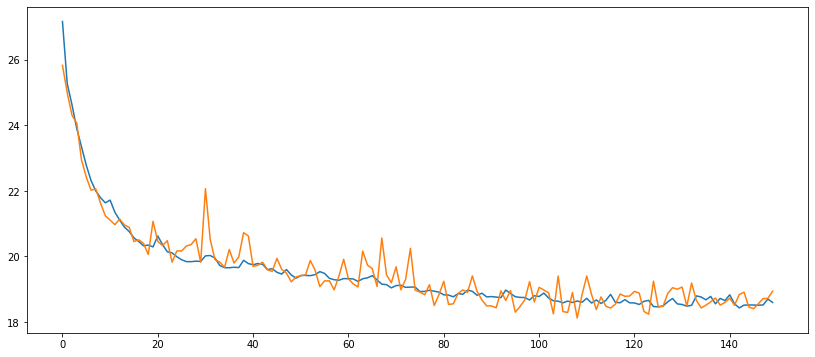

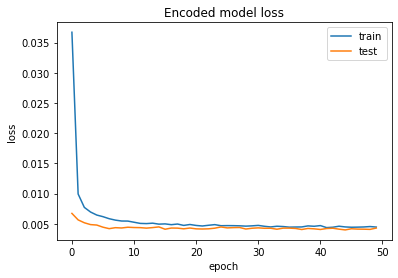

Overall accuracy of Convolutional Neural Network model: 0.999403110845827


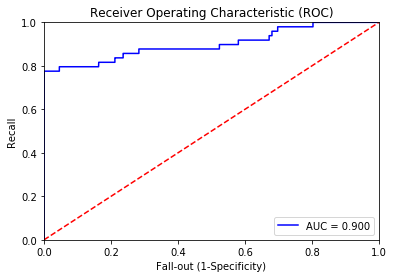

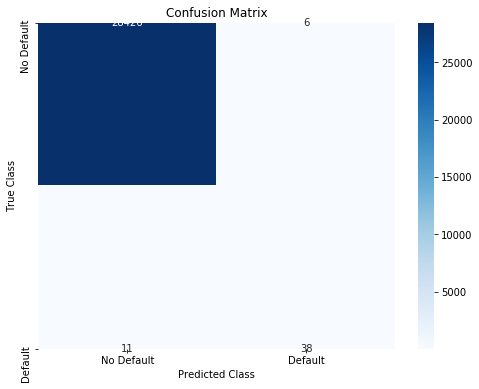

AUC(ROC): 0.887649587128042
Precision: 0.8636363636363636
Recall: 0.7755102040816326
F1 score: 0.8172043010752688
False positives: 6
True positives: 38
False negatives: 11
True negatives: 28426
Fold #3
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 27)           837         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, 27)           108         dense_26[0][0]                   
________________________________________________________________________________________

256326/256326 [==============================] - 13s 50us/step - loss: 12.0551 - rec_loss: 20.7312 - kl_loss: 2.9553 - val_loss: 11.7134 - val_rec_loss: 20.0646 - val_kl_loss: 2.9352
Epoch 17/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.8873 - rec_loss: 20.3946 - kl_loss: 2.9526 - val_loss: 11.6894 - val_rec_loss: 19.9945 - val_kl_loss: 2.9360
Epoch 18/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.6788 - rec_loss: 19.9510 - kl_loss: 2.9592 - val_loss: 11.5024 - val_rec_loss: 19.6619 - val_kl_loss: 2.9155
Epoch 19/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.6302 - rec_loss: 19.8567 - kl_loss: 2.9728 - val_loss: 11.2789 - val_rec_loss: 19.1852 - val_kl_loss: 2.9378
Epoch 20/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.6161 - rec_loss: 19.8206 - kl_loss: 2.9804 - val_loss: 11.4920 - val_rec_loss: 19.6151 - val_kl_loss: 2.9246
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2084 - rec_loss: 18.7715 - kl_loss: 3.1610 - val_loss: 10.9047 - val_rec_loss: 18.2095 - val_kl_loss: 3.1051
Epoch 59/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2043 - rec_loss: 18.7435 - kl_loss: 3.1701 - val_loss: 11.0515 - val_rec_loss: 18.4306 - val_kl_loss: 3.1753
Epoch 60/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2800 - rec_loss: 18.8940 - kl_loss: 3.1744 - val_loss: 11.0676 - val_rec_loss: 18.4799 - val_kl_loss: 3.1643
Epoch 61/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2786 - rec_loss: 18.8916 - kl_loss: 3.1748 - val_loss: 10.8708 - val_rec_loss: 18.1746 - val_kl_loss: 3.0792
Epoch 62/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2511 - rec_loss: 18.8417 - kl_loss: 3.1663 - val_loss: 10.8840 - val_rec_loss: 18.1280 - val_kl_loss: 3.1391
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.1782 - rec_loss: 18.6720 - kl_loss: 3.1897 - val_loss: 11.3806 - val_rec_loss: 19.0260 - val_kl_loss: 3.2273
Epoch 101/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2432 - rec_loss: 18.7884 - kl_loss: 3.2027 - val_loss: 11.2562 - val_rec_loss: 18.8003 - val_kl_loss: 3.2141
Epoch 102/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.1028 - rec_loss: 18.5169 - kl_loss: 3.2137 - val_loss: 10.8267 - val_rec_loss: 18.0071 - val_kl_loss: 3.1851
Epoch 103/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0959 - rec_loss: 18.4998 - kl_loss: 3.2113 - val_loss: 10.9395 - val_rec_loss: 18.3054 - val_kl_loss: 3.1016
Epoch 104/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.1331 - rec_loss: 18.5708 - kl_loss: 3.2152 - val_loss: 10.8397 - val_rec_loss: 17.9253 - val_kl_loss: 3.2841
Epoch 105/150
2

256326/256326 [==============================] - 13s 50us/step - loss: 11.0054 - rec_loss: 18.2729 - kl_loss: 3.2494 - val_loss: 10.9836 - val_rec_loss: 18.3523 - val_kl_loss: 3.1451
Epoch 142/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0269 - rec_loss: 18.3357 - kl_loss: 3.2382 - val_loss: 10.9233 - val_rec_loss: 18.2538 - val_kl_loss: 3.1192
Epoch 143/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0002 - rec_loss: 18.2679 - kl_loss: 3.2546 - val_loss: 10.8063 - val_rec_loss: 17.9801 - val_kl_loss: 3.1665
Epoch 144/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9909 - rec_loss: 18.2576 - kl_loss: 3.2533 - val_loss: 10.7919 - val_rec_loss: 17.8610 - val_kl_loss: 3.2424
Epoch 145/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0562 - rec_loss: 18.3705 - kl_loss: 3.2640 - val_loss: 10.8151 - val_rec_loss: 17.9773 - val_kl_loss: 3.1785
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 43/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 44/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 45/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 46/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 47/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 48/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.00

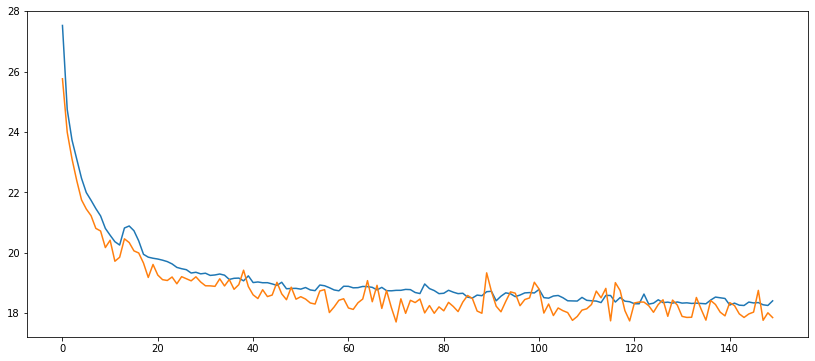

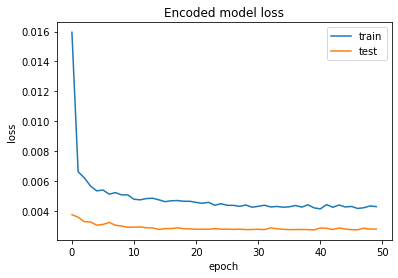

Overall accuracy of Convolutional Neural Network model: 0.9995786664794073


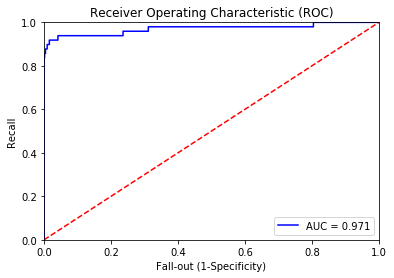

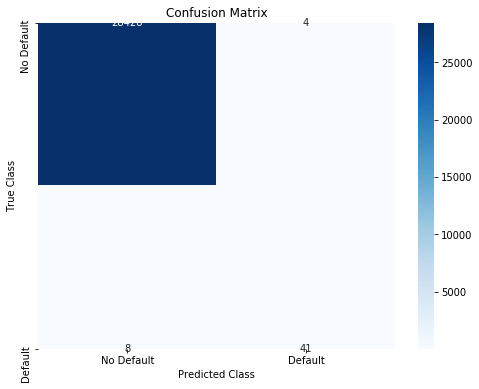

AUC(ROC): 0.9182970036635926
Precision: 0.9111111111111111
Recall: 0.8367346938775511
F1 score: 0.8723404255319148
False positives: 4
True positives: 41
False negatives: 8
True negatives: 28428
Fold #4
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 27)           837         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 27)           108         dense_35[0][0]                   
________________________________________________________________________________________

256326/256326 [==============================] - 13s 49us/step - loss: 11.7320 - rec_loss: 20.1274 - kl_loss: 2.9328 - val_loss: 11.5296 - val_rec_loss: 19.7291 - val_kl_loss: 2.9260
Epoch 17/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6543 - rec_loss: 19.9756 - kl_loss: 2.9361 - val_loss: 11.4172 - val_rec_loss: 19.4060 - val_kl_loss: 3.0240
Epoch 18/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6921 - rec_loss: 20.0481 - kl_loss: 2.9308 - val_loss: 12.4940 - val_rec_loss: 21.7451 - val_kl_loss: 2.8477
Epoch 19/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6389 - rec_loss: 19.9431 - kl_loss: 2.9364 - val_loss: 11.5518 - val_rec_loss: 19.8568 - val_kl_loss: 2.8527
Epoch 20/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.5694 - rec_loss: 19.8042 - kl_loss: 2.9439 - val_loss: 11.3497 - val_rec_loss: 19.4074 - val_kl_loss: 2.9069
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2144 - rec_loss: 18.9048 - kl_loss: 3.1048 - val_loss: 11.2190 - val_rec_loss: 18.9781 - val_kl_loss: 3.0424
Epoch 59/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2678 - rec_loss: 19.0172 - kl_loss: 3.1048 - val_loss: 11.4354 - val_rec_loss: 19.4790 - val_kl_loss: 2.9907
Epoch 60/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2769 - rec_loss: 19.0264 - kl_loss: 3.1215 - val_loss: 11.0452 - val_rec_loss: 18.5831 - val_kl_loss: 3.0980
Epoch 61/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2996 - rec_loss: 19.0715 - kl_loss: 3.1141 - val_loss: 10.9954 - val_rec_loss: 18.4591 - val_kl_loss: 3.1170
Epoch 62/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.2722 - rec_loss: 19.0027 - kl_loss: 3.1157 - val_loss: 11.4734 - val_rec_loss: 19.4394 - val_kl_loss: 3.0810
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0202 - rec_loss: 18.4073 - kl_loss: 3.1733 - val_loss: 11.8926 - val_rec_loss: 20.0901 - val_kl_loss: 3.2278
Epoch 101/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0108 - rec_loss: 18.3793 - kl_loss: 3.1779 - val_loss: 10.5627 - val_rec_loss: 17.5434 - val_kl_loss: 3.1162
Epoch 102/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0254 - rec_loss: 18.4142 - kl_loss: 3.1744 - val_loss: 10.8410 - val_rec_loss: 18.0507 - val_kl_loss: 3.1767
Epoch 103/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9671 - rec_loss: 18.2847 - kl_loss: 3.1891 - val_loss: 11.0941 - val_rec_loss: 18.5996 - val_kl_loss: 3.1245
Epoch 104/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9457 - rec_loss: 18.2391 - kl_loss: 3.1819 - val_loss: 10.7247 - val_rec_loss: 17.8307 - val_kl_loss: 3.1456
Epoch 105/150
2

256326/256326 [==============================] - 13s 50us/step - loss: 10.8519 - rec_loss: 18.0500 - kl_loss: 3.1962 - val_loss: 11.4152 - val_rec_loss: 19.1735 - val_kl_loss: 3.1966
Epoch 142/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.8106 - rec_loss: 17.9304 - kl_loss: 3.2306 - val_loss: 10.9455 - val_rec_loss: 18.0907 - val_kl_loss: 3.3395
Epoch 143/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.8291 - rec_loss: 17.9843 - kl_loss: 3.2075 - val_loss: 11.5681 - val_rec_loss: 19.5576 - val_kl_loss: 3.1194
Epoch 144/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.8931 - rec_loss: 18.1058 - kl_loss: 3.2160 - val_loss: 10.8658 - val_rec_loss: 17.9978 - val_kl_loss: 3.2636
Epoch 145/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9165 - rec_loss: 18.1288 - kl_loss: 3.2389 - val_loss: 11.3013 - val_rec_loss: 18.8348 - val_kl_loss: 3.2868
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 43/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 44/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 45/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 46/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 47/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 48/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.00

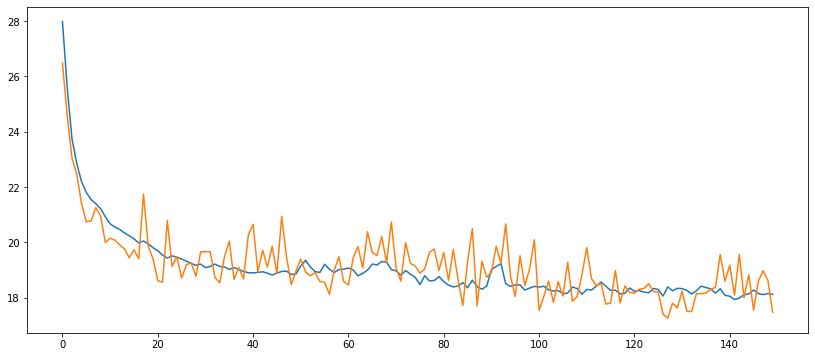

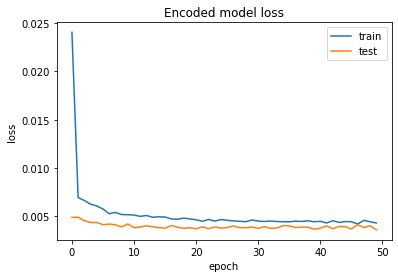

Overall accuracy of Convolutional Neural Network model: 0.9992977774656788


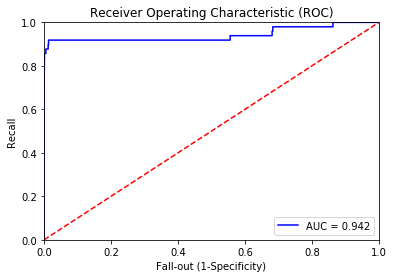

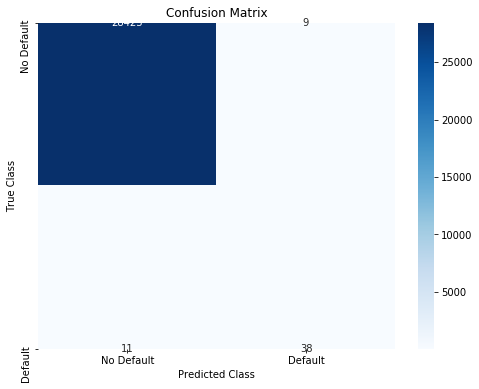

AUC(ROC): 0.8875968296716548
Precision: 0.8085106382978723
Recall: 0.7755102040816326
F1 score: 0.7916666666666665
False positives: 9
True positives: 38
False negatives: 11
True negatives: 28423
Fold #5
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 27)           837         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 27)           108         dense_44[0][0]                   
______________________________________________________________________________________

256326/256326 [==============================] - 13s 51us/step - loss: 11.6792 - rec_loss: 20.0703 - kl_loss: 2.8132 - val_loss: 11.7520 - val_rec_loss: 20.2572 - val_kl_loss: 2.7840
Epoch 17/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.6155 - rec_loss: 19.9284 - kl_loss: 2.8410 - val_loss: 11.7593 - val_rec_loss: 20.2974 - val_kl_loss: 2.7560
Epoch 18/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.5705 - rec_loss: 19.8147 - kl_loss: 2.8515 - val_loss: 11.9430 - val_rec_loss: 20.5965 - val_kl_loss: 2.8169
Epoch 19/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.5837 - rec_loss: 19.8395 - kl_loss: 2.8494 - val_loss: 11.6680 - val_rec_loss: 20.0129 - val_kl_loss: 2.8397
Epoch 20/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.5238 - rec_loss: 19.6937 - kl_loss: 2.8747 - val_loss: 11.6953 - val_rec_loss: 20.1821 - val_kl_loss: 2.7343
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1378 - rec_loss: 18.7201 - kl_loss: 3.0611 - val_loss: 11.5219 - val_rec_loss: 19.5031 - val_kl_loss: 3.0609
Epoch 59/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1475 - rec_loss: 18.7469 - kl_loss: 3.0621 - val_loss: 11.8698 - val_rec_loss: 20.3923 - val_kl_loss: 2.8773
Epoch 60/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1181 - rec_loss: 18.6828 - kl_loss: 3.0664 - val_loss: 11.1714 - val_rec_loss: 18.9029 - val_kl_loss: 2.9544
Epoch 61/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1166 - rec_loss: 18.6695 - kl_loss: 3.0730 - val_loss: 11.6703 - val_rec_loss: 19.8277 - val_kl_loss: 3.0250
Epoch 62/150
256326/256326 [==============================] - 13s 51us/step - loss: 11.1164 - rec_loss: 18.6808 - kl_loss: 3.0645 - val_loss: 11.8065 - val_rec_loss: 20.1202 - val_kl_loss: 2.9998
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9340 - rec_loss: 18.1946 - kl_loss: 3.1450 - val_loss: 11.1759 - val_rec_loss: 18.7973 - val_kl_loss: 3.0330
Epoch 101/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.8984 - rec_loss: 18.1355 - kl_loss: 3.1403 - val_loss: 10.9378 - val_rec_loss: 18.2859 - val_kl_loss: 3.0632
Epoch 102/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.8974 - rec_loss: 18.1360 - kl_loss: 3.1453 - val_loss: 11.1659 - val_rec_loss: 18.6960 - val_kl_loss: 3.1229
Epoch 103/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9933 - rec_loss: 18.3381 - kl_loss: 3.1302 - val_loss: 11.4887 - val_rec_loss: 19.2609 - val_kl_loss: 3.2033
Epoch 104/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9835 - rec_loss: 18.3288 - kl_loss: 3.1185 - val_loss: 10.9630 - val_rec_loss: 18.2030 - val_kl_loss: 3.2005
Epoch 105/150
2

256326/256326 [==============================] - 13s 51us/step - loss: 10.9426 - rec_loss: 18.1519 - kl_loss: 3.1908 - val_loss: 10.7998 - val_rec_loss: 17.8375 - val_kl_loss: 3.2154
Epoch 142/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.8889 - rec_loss: 18.0428 - kl_loss: 3.1775 - val_loss: 11.1589 - val_rec_loss: 18.6532 - val_kl_loss: 3.0933
Epoch 143/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.8323 - rec_loss: 17.9278 - kl_loss: 3.1789 - val_loss: 11.1234 - val_rec_loss: 18.5783 - val_kl_loss: 3.1215
Epoch 144/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9031 - rec_loss: 18.0837 - kl_loss: 3.1708 - val_loss: 10.8909 - val_rec_loss: 18.1317 - val_kl_loss: 3.0837
Epoch 145/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.8978 - rec_loss: 18.0889 - kl_loss: 3.1572 - val_loss: 10.7006 - val_rec_loss: 17.6979 - val_kl_loss: 3.1418
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 43/50
256326/256326 [==============================] - 48s 185us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 44/50
256326/256326 [==============================] - 48s 185us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 45/50
256326/256326 [==============================] - 48s 187us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 46/50
256326/256326 [==============================] - 51s 201us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 47/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 48/50
256326/256326 [==============================] - 48s 185us/step - loss: 0.00

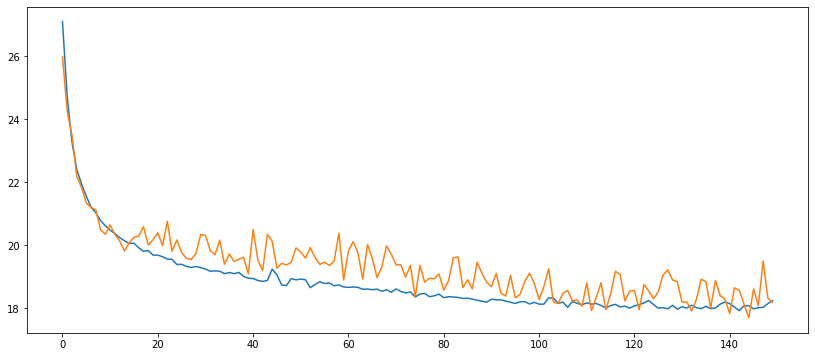

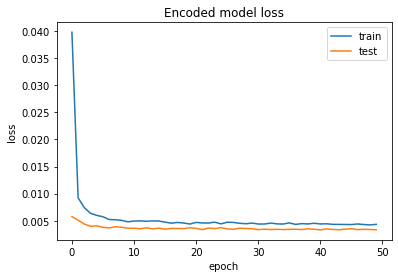

Overall accuracy of Convolutional Neural Network model: 0.9994382219725431


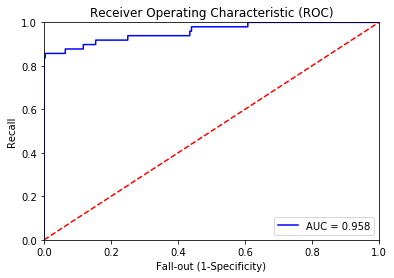

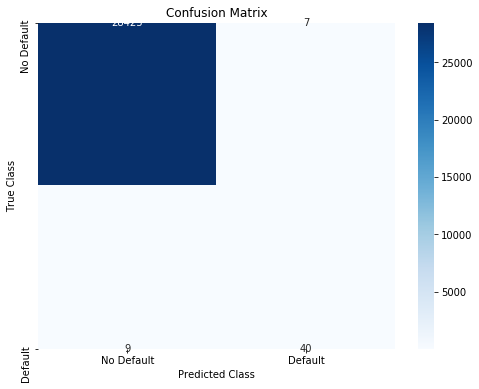

AUC(ROC): 0.9080401645745524
Precision: 0.851063829787234
Recall: 0.8163265306122449
F1 score: 0.8333333333333334
False positives: 7
True positives: 40
False negatives: 9
True negatives: 28425
Fold #6
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_53 (Dense)                (None, 27)           837         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 27)           108         dense_53[0][0]                   
________________________________________________________________________________________

256326/256326 [==============================] - 13s 49us/step - loss: 11.6300 - rec_loss: 20.0237 - kl_loss: 2.8456 - val_loss: 11.7460 - val_rec_loss: 20.2405 - val_kl_loss: 2.8482
Epoch 17/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.5738 - rec_loss: 19.8958 - kl_loss: 2.8583 - val_loss: 11.5930 - val_rec_loss: 19.9784 - val_kl_loss: 2.8126
Epoch 18/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.5462 - rec_loss: 19.8338 - kl_loss: 2.8615 - val_loss: 11.2919 - val_rec_loss: 19.3406 - val_kl_loss: 2.8465
Epoch 19/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.5012 - rec_loss: 19.7080 - kl_loss: 2.8934 - val_loss: 11.8578 - val_rec_loss: 20.4741 - val_kl_loss: 2.8250
Epoch 20/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.4571 - rec_loss: 19.6091 - kl_loss: 2.8983 - val_loss: 11.4268 - val_rec_loss: 19.4052 - val_kl_loss: 3.0303
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0810 - rec_loss: 18.6739 - kl_loss: 3.0321 - val_loss: 11.0977 - val_rec_loss: 18.7709 - val_kl_loss: 2.9658
Epoch 59/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.1254 - rec_loss: 18.7382 - kl_loss: 3.0521 - val_loss: 10.8585 - val_rec_loss: 18.2656 - val_kl_loss: 2.9918
Epoch 60/150
256326/256326 [==============================] - 13s 50us/step - loss: 11.0497 - rec_loss: 18.6178 - kl_loss: 3.0381 - val_loss: 11.4192 - val_rec_loss: 19.3923 - val_kl_loss: 2.9931
Epoch 61/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.0642 - rec_loss: 18.6473 - kl_loss: 3.0375 - val_loss: 11.4340 - val_rec_loss: 19.4488 - val_kl_loss: 2.9712
Epoch 62/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.0484 - rec_loss: 18.6000 - kl_loss: 3.0544 - val_loss: 11.7787 - val_rec_loss: 20.0890 - val_kl_loss: 3.0206
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9770 - rec_loss: 18.2252 - kl_loss: 3.2667 - val_loss: 10.7215 - val_rec_loss: 17.8661 - val_kl_loss: 3.1170
Epoch 101/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9467 - rec_loss: 18.1660 - kl_loss: 3.2695 - val_loss: 10.7597 - val_rec_loss: 17.8904 - val_kl_loss: 3.1781
Epoch 102/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.8862 - rec_loss: 18.0575 - kl_loss: 3.2649 - val_loss: 11.8375 - val_rec_loss: 20.0360 - val_kl_loss: 3.1798
Epoch 103/150
256326/256326 [==============================] - 13s 51us/step - loss: 10.9133 - rec_loss: 18.1021 - kl_loss: 3.2659 - val_loss: 10.8742 - val_rec_loss: 17.9800 - val_kl_loss: 3.3142
Epoch 104/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9289 - rec_loss: 18.1004 - kl_loss: 3.3014 - val_loss: 10.9016 - val_rec_loss: 18.1193 - val_kl_loss: 3.2318
Epoch 105/150
2

256326/256326 [==============================] - 13s 50us/step - loss: 10.8704 - rec_loss: 17.9766 - kl_loss: 3.3085 - val_loss: 11.2022 - val_rec_loss: 18.6672 - val_kl_loss: 3.2702
Epoch 142/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.8646 - rec_loss: 17.9612 - kl_loss: 3.3116 - val_loss: 11.0087 - val_rec_loss: 18.2048 - val_kl_loss: 3.3609
Epoch 143/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9012 - rec_loss: 18.0386 - kl_loss: 3.3055 - val_loss: 10.9083 - val_rec_loss: 18.2021 - val_kl_loss: 3.1525
Epoch 144/150
256326/256326 [==============================] - 13s 50us/step - loss: 10.9282 - rec_loss: 18.1032 - kl_loss: 3.2928 - val_loss: 10.8243 - val_rec_loss: 17.9655 - val_kl_loss: 3.2147
Epoch 145/150
256326/256326 [==============================] - 13s 49us/step - loss: 10.8926 - rec_loss: 18.0048 - kl_loss: 3.3122 - val_loss: 11.1171 - val_rec_loss: 18.4453 - val_kl_loss: 3.3250
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 43/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 44/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 45/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 46/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 47/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 48/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.00

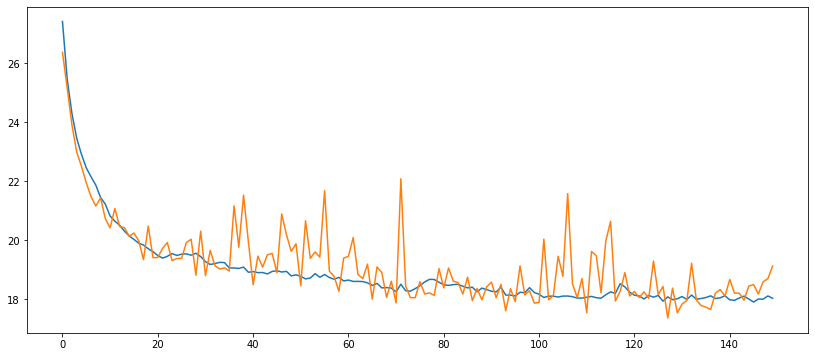

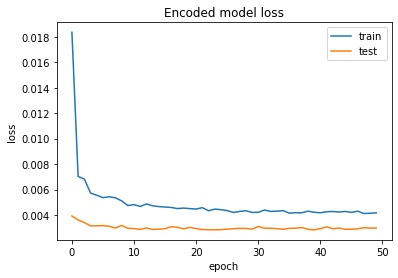

Overall accuracy of Convolutional Neural Network model: 0.9995084442259752


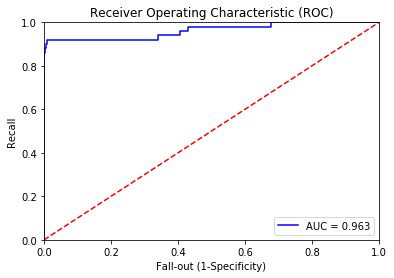

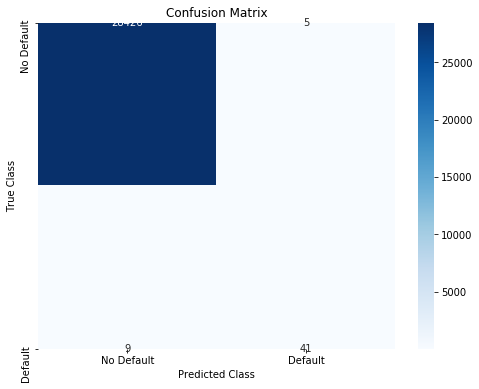

AUC(ROC): 0.9099120678133022
Precision: 0.8913043478260869
Recall: 0.82
F1 score: 0.8541666666666666
False positives: 5
True positives: 41
False negatives: 9
True negatives: 28426
Fold #7
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_62 (Dense)                (None, 27)           837         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 27)           108         dense_62[0][0]                   
__________________________________________________________________________________________________
de

256326/256326 [==============================] - 13s 52us/step - loss: 12.5623 - rec_loss: 21.6745 - kl_loss: 3.0365 - val_loss: 12.2269 - val_rec_loss: 21.1345 - val_kl_loss: 2.9036
Epoch 17/150
256326/256326 [==============================] - 13s 51us/step - loss: 12.5229 - rec_loss: 21.6085 - kl_loss: 3.0269 - val_loss: 12.2850 - val_rec_loss: 21.2262 - val_kl_loss: 2.9337
Epoch 18/150
256326/256326 [==============================] - 13s 52us/step - loss: 12.4863 - rec_loss: 21.5253 - kl_loss: 3.0398 - val_loss: 12.4720 - val_rec_loss: 21.4670 - val_kl_loss: 3.0692
Epoch 19/150
256326/256326 [==============================] - 13s 51us/step - loss: 12.4761 - rec_loss: 21.5250 - kl_loss: 3.0309 - val_loss: 12.4842 - val_rec_loss: 21.5823 - val_kl_loss: 2.9829
Epoch 20/150
256326/256326 [==============================] - 13s 51us/step - loss: 12.4328 - rec_loss: 21.4162 - kl_loss: 3.0460 - val_loss: 12.2263 - val_rec_loss: 21.0399 - val_kl_loss: 3.0195
Epoch 21/150
256326/256326 [=====

Epoch 58/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.9439 - rec_loss: 20.3720 - kl_loss: 3.0459 - val_loss: 12.5254 - val_rec_loss: 21.5453 - val_kl_loss: 3.0162
Epoch 59/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.9215 - rec_loss: 20.3422 - kl_loss: 3.0343 - val_loss: 12.2217 - val_rec_loss: 20.8259 - val_kl_loss: 3.1375
Epoch 60/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.8844 - rec_loss: 20.2288 - kl_loss: 3.0606 - val_loss: 12.0980 - val_rec_loss: 20.6311 - val_kl_loss: 3.0728
Epoch 61/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.8789 - rec_loss: 20.1909 - kl_loss: 3.0719 - val_loss: 12.0464 - val_rec_loss: 20.6766 - val_kl_loss: 2.9330
Epoch 62/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.9357 - rec_loss: 20.3372 - kl_loss: 3.0394 - val_loss: 11.8532 - val_rec_loss: 20.0670 - val_kl_loss: 3.1516
Epoch 63/150
256326/

Epoch 100/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6115 - rec_loss: 19.5384 - kl_loss: 3.1473 - val_loss: 11.6352 - val_rec_loss: 19.5946 - val_kl_loss: 3.1529
Epoch 101/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6009 - rec_loss: 19.5125 - kl_loss: 3.1638 - val_loss: 11.9211 - val_rec_loss: 20.1911 - val_kl_loss: 3.1335
Epoch 102/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.5986 - rec_loss: 19.5438 - kl_loss: 3.1393 - val_loss: 12.0289 - val_rec_loss: 20.4306 - val_kl_loss: 3.1206
Epoch 103/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6086 - rec_loss: 19.5586 - kl_loss: 3.1409 - val_loss: 11.5402 - val_rec_loss: 19.3767 - val_kl_loss: 3.1743
Epoch 104/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.5892 - rec_loss: 19.5331 - kl_loss: 3.1409 - val_loss: 11.6914 - val_rec_loss: 19.7490 - val_kl_loss: 3.1168
Epoch 105/150
2

256326/256326 [==============================] - 13s 49us/step - loss: 11.7350 - rec_loss: 19.8078 - kl_loss: 3.1211 - val_loss: 12.0448 - val_rec_loss: 20.5106 - val_kl_loss: 3.0421
Epoch 142/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.6843 - rec_loss: 19.7097 - kl_loss: 3.1262 - val_loss: 12.2325 - val_rec_loss: 20.9081 - val_kl_loss: 3.0291
Epoch 143/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.7096 - rec_loss: 19.7667 - kl_loss: 3.1159 - val_loss: 12.0435 - val_rec_loss: 20.4481 - val_kl_loss: 3.1182
Epoch 144/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.5875 - rec_loss: 19.5277 - kl_loss: 3.1254 - val_loss: 12.2454 - val_rec_loss: 20.8255 - val_kl_loss: 3.1598
Epoch 145/150
256326/256326 [==============================] - 13s 49us/step - loss: 11.7515 - rec_loss: 19.8697 - kl_loss: 3.1059 - val_loss: 12.3010 - val_rec_loss: 20.9523 - val_kl_loss: 3.1223
Epoch 146/150
256326/256326 [

Epoch 42/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 43/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 44/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 45/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 46/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 47/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 48/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.00

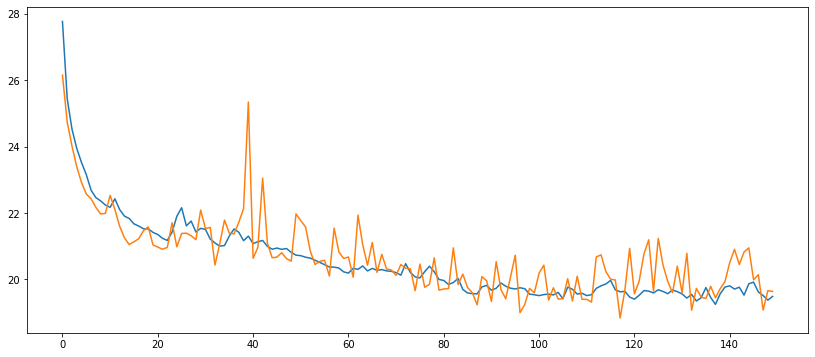

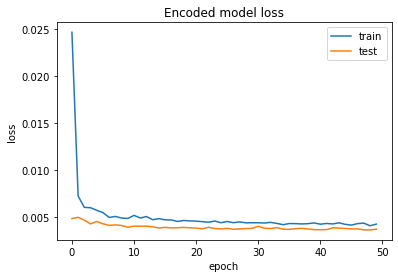

Overall accuracy of Convolutional Neural Network model: 0.999403110845827


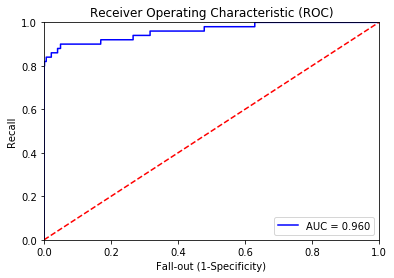

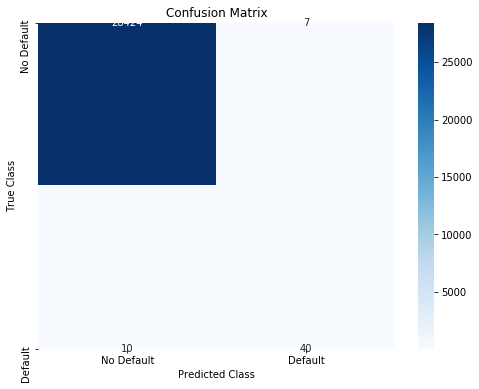

AUC(ROC): 0.8998768949386232
Precision: 0.851063829787234
Recall: 0.8
F1 score: 0.8247422680412372
False positives: 7
True positives: 40
False negatives: 10
True negatives: 28424
Fold #8
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_71 (Dense)                (None, 27)           837         input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_87 (BatchNo (None, 27)           108         dense_71[0][0]                   
__________________________________________________________________________________________________
den

256327/256327 [==============================] - 13s 50us/step - loss: 11.9033 - rec_loss: 20.4897 - kl_loss: 2.8771 - val_loss: 12.2308 - val_rec_loss: 21.2351 - val_kl_loss: 2.7996
Epoch 17/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.9081 - rec_loss: 20.5080 - kl_loss: 2.8771 - val_loss: 12.0885 - val_rec_loss: 20.9177 - val_kl_loss: 2.8429
Epoch 18/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.8537 - rec_loss: 20.3806 - kl_loss: 2.8941 - val_loss: 11.8520 - val_rec_loss: 20.3467 - val_kl_loss: 2.9153
Epoch 19/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.8565 - rec_loss: 20.3773 - kl_loss: 2.8943 - val_loss: 12.1998 - val_rec_loss: 21.1421 - val_kl_loss: 2.8293
Epoch 20/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.8505 - rec_loss: 20.3755 - kl_loss: 2.8966 - val_loss: 12.3198 - val_rec_loss: 21.4698 - val_kl_loss: 2.7522
Epoch 21/150
256327/256327 [=====

Epoch 58/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3137 - rec_loss: 19.0754 - kl_loss: 3.1176 - val_loss: 11.9035 - val_rec_loss: 20.2533 - val_kl_loss: 3.1145
Epoch 59/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3098 - rec_loss: 19.0354 - kl_loss: 3.1317 - val_loss: 11.4502 - val_rec_loss: 19.3874 - val_kl_loss: 3.0658
Epoch 60/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3422 - rec_loss: 19.1481 - kl_loss: 3.0980 - val_loss: 13.3207 - val_rec_loss: 23.1962 - val_kl_loss: 3.0287
Epoch 61/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3306 - rec_loss: 19.1240 - kl_loss: 3.1024 - val_loss: 12.3920 - val_rec_loss: 21.2391 - val_kl_loss: 3.1058
Epoch 62/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2745 - rec_loss: 18.9946 - kl_loss: 3.1134 - val_loss: 11.5663 - val_rec_loss: 19.6766 - val_kl_loss: 3.0280
Epoch 63/150
256327/

Epoch 100/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1446 - rec_loss: 18.6612 - kl_loss: 3.1937 - val_loss: 13.8250 - val_rec_loss: 24.0790 - val_kl_loss: 3.1294
Epoch 101/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1421 - rec_loss: 18.6777 - kl_loss: 3.1674 - val_loss: 11.2817 - val_rec_loss: 19.0454 - val_kl_loss: 3.0735
Epoch 102/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1071 - rec_loss: 18.5912 - kl_loss: 3.1841 - val_loss: 11.7422 - val_rec_loss: 19.9953 - val_kl_loss: 3.0537
Epoch 103/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1127 - rec_loss: 18.6091 - kl_loss: 3.1753 - val_loss: 12.1440 - val_rec_loss: 20.6598 - val_kl_loss: 3.1804
Epoch 104/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1186 - rec_loss: 18.6225 - kl_loss: 3.1684 - val_loss: 11.5158 - val_rec_loss: 19.4243 - val_kl_loss: 3.1751
Epoch 105/150
2

256327/256327 [==============================] - 13s 50us/step - loss: 11.1360 - rec_loss: 18.5887 - kl_loss: 3.2094 - val_loss: 11.2148 - val_rec_loss: 18.6551 - val_kl_loss: 3.3023
Epoch 142/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.1093 - rec_loss: 18.5461 - kl_loss: 3.2150 - val_loss: 12.1525 - val_rec_loss: 20.6858 - val_kl_loss: 3.1627
Epoch 143/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1118 - rec_loss: 18.5469 - kl_loss: 3.2157 - val_loss: 11.5011 - val_rec_loss: 19.3217 - val_kl_loss: 3.2150
Epoch 144/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.1527 - rec_loss: 18.6248 - kl_loss: 3.2020 - val_loss: 11.2208 - val_rec_loss: 18.8328 - val_kl_loss: 3.1308
Epoch 145/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.0827 - rec_loss: 18.4797 - kl_loss: 3.2186 - val_loss: 11.3858 - val_rec_loss: 19.0726 - val_kl_loss: 3.2554
Epoch 146/150
256327/256327 [

Epoch 42/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 43/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 44/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 45/50
256327/256327 [==============================] - 46s 180us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 46/50
256327/256327 [==============================] - 46s 180us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 47/50
256327/256327 [==============================] - 46s 180us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 48/50
256327/256327 [==============================] - 46s 180us/step - loss: 0.00

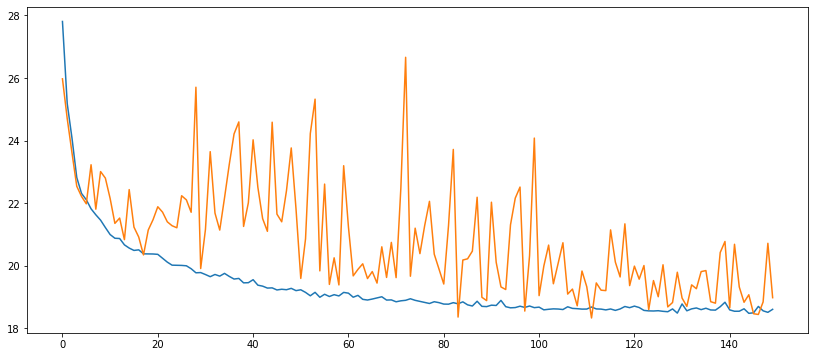

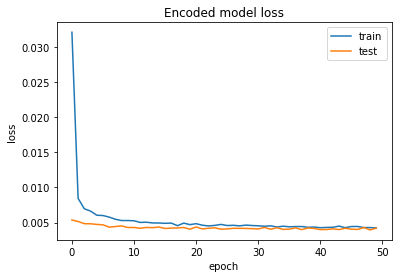

Overall accuracy of Convolutional Neural Network model: 0.9993328651685394


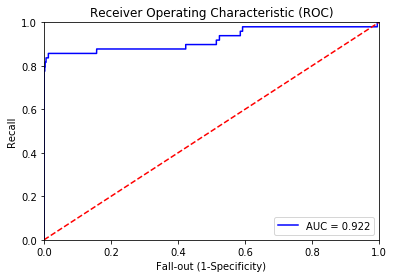

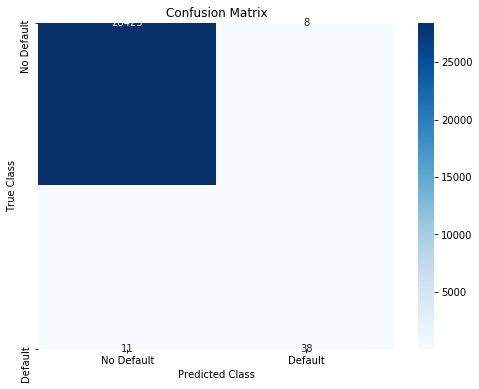

AUC(ROC): 0.8876144105421001
Precision: 0.8260869565217391
Recall: 0.7755102040816326
F1 score: 0.8
False positives: 8
True positives: 38
False negatives: 11
True negatives: 28423
Fold #9
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_80 (Dense)                (None, 27)           837         input_18[0][0]                   
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 27)           108         dense_80[0][0]                   
__________________________________________________________________________________________________
de

256327/256327 [==============================] - 13s 49us/step - loss: 11.7499 - rec_loss: 20.1255 - kl_loss: 2.9233 - val_loss: 11.6985 - val_rec_loss: 20.1367 - val_kl_loss: 2.8025
Epoch 17/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.7444 - rec_loss: 20.0914 - kl_loss: 2.9384 - val_loss: 11.7442 - val_rec_loss: 20.0288 - val_kl_loss: 2.9990
Epoch 18/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.7299 - rec_loss: 20.0610 - kl_loss: 2.9366 - val_loss: 11.6253 - val_rec_loss: 19.8623 - val_kl_loss: 2.9235
Epoch 19/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.6797 - rec_loss: 19.9499 - kl_loss: 2.9472 - val_loss: 11.9724 - val_rec_loss: 20.5475 - val_kl_loss: 2.9363
Epoch 20/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.6706 - rec_loss: 19.9185 - kl_loss: 2.9639 - val_loss: 11.5408 - val_rec_loss: 19.7141 - val_kl_loss: 2.9149
Epoch 21/150
256327/256327 [=====

Epoch 58/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.5027 - rec_loss: 19.4760 - kl_loss: 3.0625 - val_loss: 11.5374 - val_rec_loss: 19.4992 - val_kl_loss: 3.1023
Epoch 59/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.4629 - rec_loss: 19.3802 - kl_loss: 3.0794 - val_loss: 11.1698 - val_rec_loss: 18.7958 - val_kl_loss: 3.0629
Epoch 60/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.5090 - rec_loss: 19.4766 - kl_loss: 3.0734 - val_loss: 11.5213 - val_rec_loss: 19.5376 - val_kl_loss: 3.0401
Epoch 61/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.4525 - rec_loss: 19.3766 - kl_loss: 3.0582 - val_loss: 11.2073 - val_rec_loss: 18.8834 - val_kl_loss: 3.0450
Epoch 62/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.5209 - rec_loss: 19.4504 - kl_loss: 3.0979 - val_loss: 11.3453 - val_rec_loss: 19.1891 - val_kl_loss: 3.0129
Epoch 63/150
256327/

Epoch 100/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2662 - rec_loss: 19.0115 - kl_loss: 3.0661 - val_loss: 11.4613 - val_rec_loss: 19.4802 - val_kl_loss: 2.9911
Epoch 101/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2931 - rec_loss: 19.0658 - kl_loss: 3.0677 - val_loss: 11.1501 - val_rec_loss: 18.8703 - val_kl_loss: 2.9801
Epoch 102/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2577 - rec_loss: 18.9942 - kl_loss: 3.0719 - val_loss: 10.8788 - val_rec_loss: 18.3296 - val_kl_loss: 2.9719
Epoch 103/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2518 - rec_loss: 18.9816 - kl_loss: 3.0685 - val_loss: 11.1171 - val_rec_loss: 18.5984 - val_kl_loss: 3.1838
Epoch 104/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2930 - rec_loss: 19.0481 - kl_loss: 3.0810 - val_loss: 11.1300 - val_rec_loss: 18.7569 - val_kl_loss: 3.0382
Epoch 105/150
2

256327/256327 [==============================] - 13s 49us/step - loss: 11.2505 - rec_loss: 18.9444 - kl_loss: 3.0987 - val_loss: 11.7284 - val_rec_loss: 19.9407 - val_kl_loss: 3.0642
Epoch 142/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2485 - rec_loss: 18.9477 - kl_loss: 3.0951 - val_loss: 11.1182 - val_rec_loss: 18.7735 - val_kl_loss: 3.0017
Epoch 143/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3079 - rec_loss: 19.0849 - kl_loss: 3.0801 - val_loss: 11.0488 - val_rec_loss: 18.5897 - val_kl_loss: 3.0633
Epoch 144/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2349 - rec_loss: 18.9227 - kl_loss: 3.0941 - val_loss: 11.0215 - val_rec_loss: 18.5854 - val_kl_loss: 2.9977
Epoch 145/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.2189 - rec_loss: 18.9092 - kl_loss: 3.0890 - val_loss: 10.9769 - val_rec_loss: 18.5315 - val_kl_loss: 2.9713
Epoch 146/150
256327/256327 [

Epoch 42/50
256327/256327 [==============================] - 50s 193us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 43/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 44/50
256327/256327 [==============================] - 48s 189us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 45/50
256327/256327 [==============================] - 50s 195us/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 46/50
256327/256327 [==============================] - 49s 189us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 47/50
256327/256327 [==============================] - 50s 195us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 48/50
256327/256327 [==============================] - 48s 189us/step - loss: 0.00

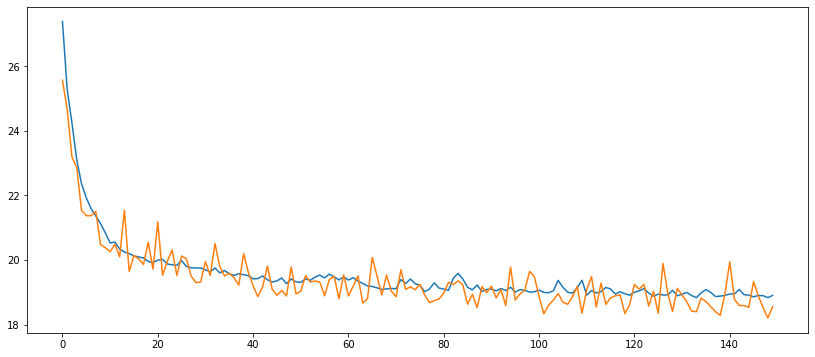

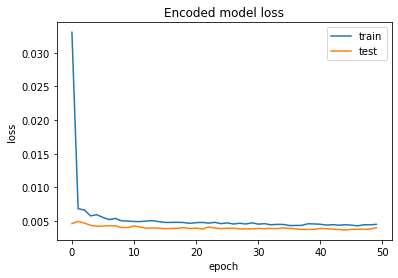

Overall accuracy of Convolutional Neural Network model: 0.9992626404494382


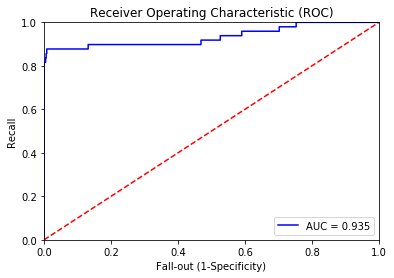

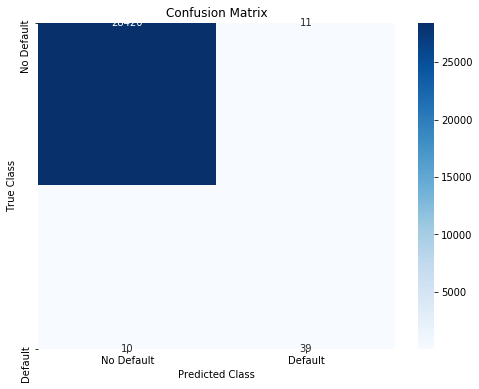

AUC(ROC): 0.8977657328627346
Precision: 0.78
Recall: 0.7959183673469388
F1 score: 0.7878787878787878
False positives: 11
True positives: 39
False negatives: 10
True negatives: 28420
Fold #10
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_89 (Dense)                (None, 27)           837         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_109 (BatchN (None, 27)           108         dense_89[0][0]                   
__________________________________________________________________________________________________

256327/256327 [==============================] - 13s 53us/step - loss: 12.1045 - rec_loss: 20.6511 - kl_loss: 3.0687 - val_loss: 11.8274 - val_rec_loss: 20.1469 - val_kl_loss: 3.0331
Epoch 17/150
256327/256327 [==============================] - 13s 49us/step - loss: 12.0770 - rec_loss: 20.6106 - kl_loss: 3.0633 - val_loss: 12.4324 - val_rec_loss: 21.3614 - val_kl_loss: 3.0052
Epoch 18/150
256327/256327 [==============================] - 13s 49us/step - loss: 12.0528 - rec_loss: 20.5238 - kl_loss: 3.0830 - val_loss: 11.8653 - val_rec_loss: 20.1320 - val_kl_loss: 3.0937
Epoch 19/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.9896 - rec_loss: 20.3432 - kl_loss: 3.1247 - val_loss: 11.8924 - val_rec_loss: 20.1014 - val_kl_loss: 3.1671
Epoch 20/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.9621 - rec_loss: 20.2731 - kl_loss: 3.1306 - val_loss: 11.9311 - val_rec_loss: 20.1918 - val_kl_loss: 3.1305
Epoch 21/150
256327/256327 [=====

Epoch 58/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.4179 - rec_loss: 19.1149 - kl_loss: 3.2516 - val_loss: 11.4264 - val_rec_loss: 19.1269 - val_kl_loss: 3.2508
Epoch 59/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.4363 - rec_loss: 19.1465 - kl_loss: 3.2560 - val_loss: 11.3264 - val_rec_loss: 18.9964 - val_kl_loss: 3.1870
Epoch 60/150
256327/256327 [==============================] - 13s 49us/step - loss: 11.3861 - rec_loss: 19.0381 - kl_loss: 3.2659 - val_loss: 11.1765 - val_rec_loss: 18.6214 - val_kl_loss: 3.2631
Epoch 61/150
256327/256327 [==============================] - 13s 51us/step - loss: 11.3873 - rec_loss: 19.0353 - kl_loss: 3.2819 - val_loss: 11.3889 - val_rec_loss: 19.0890 - val_kl_loss: 3.2107
Epoch 62/150
256327/256327 [==============================] - 13s 51us/step - loss: 11.3952 - rec_loss: 19.0411 - kl_loss: 3.2832 - val_loss: 11.1934 - val_rec_loss: 18.6358 - val_kl_loss: 3.2857
Epoch 63/150
256327/

Epoch 100/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2674 - rec_loss: 18.7059 - kl_loss: 3.3556 - val_loss: 11.2851 - val_rec_loss: 18.8037 - val_kl_loss: 3.2973
Epoch 101/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2602 - rec_loss: 18.6910 - kl_loss: 3.3513 - val_loss: 11.1883 - val_rec_loss: 18.5711 - val_kl_loss: 3.3371
Epoch 102/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2537 - rec_loss: 18.6632 - kl_loss: 3.3657 - val_loss: 11.1184 - val_rec_loss: 18.3723 - val_kl_loss: 3.3599
Epoch 103/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2356 - rec_loss: 18.6346 - kl_loss: 3.3607 - val_loss: 11.4937 - val_rec_loss: 19.1751 - val_kl_loss: 3.3186
Epoch 104/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2424 - rec_loss: 18.6403 - kl_loss: 3.3643 - val_loss: 11.1702 - val_rec_loss: 18.5125 - val_kl_loss: 3.3399
Epoch 105/150
2

256327/256327 [==============================] - 13s 50us/step - loss: 11.1502 - rec_loss: 18.3976 - kl_loss: 3.3937 - val_loss: 11.0139 - val_rec_loss: 18.1398 - val_kl_loss: 3.3937
Epoch 142/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2757 - rec_loss: 18.6348 - kl_loss: 3.4042 - val_loss: 11.1587 - val_rec_loss: 18.4118 - val_kl_loss: 3.3647
Epoch 143/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2238 - rec_loss: 18.5283 - kl_loss: 3.3954 - val_loss: 11.1474 - val_rec_loss: 18.2929 - val_kl_loss: 3.4780
Epoch 144/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.1558 - rec_loss: 18.4410 - kl_loss: 3.3605 - val_loss: 11.2382 - val_rec_loss: 18.6500 - val_kl_loss: 3.2959
Epoch 145/150
256327/256327 [==============================] - 13s 50us/step - loss: 11.2619 - rec_loss: 18.5964 - kl_loss: 3.3877 - val_loss: 11.2597 - val_rec_loss: 18.5833 - val_kl_loss: 3.3713
Epoch 146/150
256327/256327 [

Epoch 42/50
256327/256327 [==============================] - 49s 193us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 43/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 44/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 45/50
256327/256327 [==============================] - 49s 193us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 46/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 47/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 48/50
256327/256327 [==============================] - 50s 194us/step - loss: 0.00

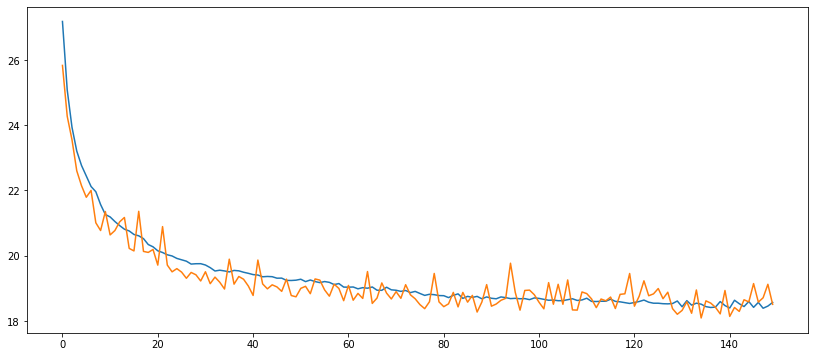

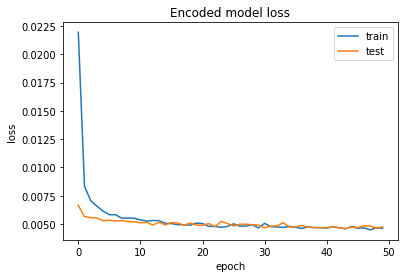

Overall accuracy of Convolutional Neural Network model: 0.9992626404494382


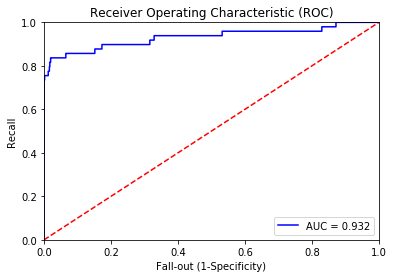

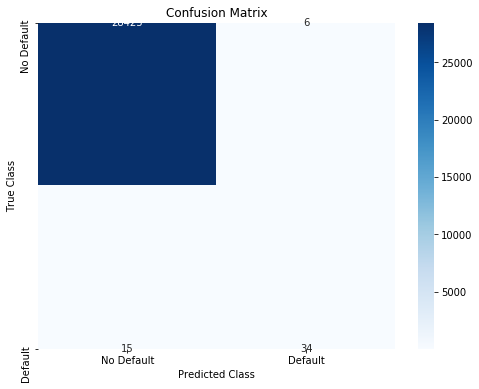

AUC(ROC): 0.846833256886167
Precision: 0.85
Recall: 0.6938775510204082
F1 score: 0.7640449438202247
False positives: 6
True positives: 34
False negatives: 15
True negatives: 28425


In [12]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    #print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    #print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    #sm = SMOTE(random_state=2)
    #X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    #print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    #print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    #print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    #print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = x_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(x_train, x_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [13]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 28423.8
Average fp = 7.7
Average fn = 10.4
Average tp = 38.8
Average Precision = 83.44%
Average Recall = 78.86%
Average F1 score = 81.09%


In [14]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 284238
Total fp: 77
 Total fn:104
 Total tp:388
Total Precision = 0.8344086021505376
Total Recall = 0.7886178861788617
Total F1_score = 0.8108672936259141
